# SNN_0

This code is designed to demo the use of a Spiking Neural Network to propogate spikes between neurons. At this stage there is no learning involved, it's purely about propogating spikes between LIF neurons.

More biologically plausible neurons and learning will be introduced later.

### Set up the environment

In [2]:
import numpy as np
from mnist import MNIST   
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
duration = 50        # Length of each time period (ms)

### Utility functions

In [52]:
def plot_neuron_behaviour(time, Vm, neuron_type, neuron_id, y_title):
    plt.plot(time,Vm)
    plt.title('{} @ {}'.format(neuron_type, neuron_id))
    plt.ylabel(y_title)
    plt.xlabel('Time (msec)')
    plt.ylim([0,2])
    plt.show()

In [53]:
def plot_membrane_potential(time, Vm, neuron_type = 'Leaky Integrate and Fire', neuron_id = 0):
    plot_neuron_behaviour(time, Vm, neuron_type, neuron_id, y_title = 'Membrane potential (V)')

def plot_spikes(time, Vm, neuron_type = 'Leaky Integrate and Fire', neuron_id = 0):
    plot_neuron_behaviour(time, Vm, neuron_type, neuron_id, y_title = 'Spike (V)')

### Create a basic neuron class

Use LIF neuron for now, this can be made more complex over time.

Based on http://neurdon.wpengine.com/2011/01/19/neural-modeling-with-python-part-1/

In [54]:
class Neuron():
    def __init__(self):
        # Simulation config (may not all be needed!!)
        self.T        = 50          # total time to sumulate (msec)
        self.dt       = 0.125       # simulation time step
        #self.time     = np.arange(0, T+dt, dt) # Time array
        self.t_rest   = 0           # initial refractory time
        
        #LIF Properties 
        #self.Vm       = np.zeros(len(time)) # potential (V) trace over time
        self.Vm       = 0                # Initial potential (mV)
        self.output   = 0                # Neuron output
        self.t        = 0                # Neuron time step
        self.Rm       = 1                # Resistance (kOhm)
        self.Cm       = 10               # Capacitance (uF)
        self.tau_m    = self.Rm * self.Cm # Time constant
        self.tau_ref  = 4                # refractory period (ms)
        self.Vth      = 0.75             # = 1  #spike threshold
        self.V_spike  = 0.5              # spike delta (V)
    
    def spike_generator(self, input, duration):
        time = np.arange(self.t, self.t+duration+self.dt, self.dt)
        Vm = np.zeros(len(time)) # potential (V) trace over time
        output = np.zeros(len(time))
        Vm[-1] = self.Vm   # Vm[0] doesn't work due to the equation below starting with [i-1] when i=0
        print ('Neuron.spike_generator.initial_state(input={}, duration={}, Vm={}, t={})'
               .format(input, duration, self.Vm, self.t))
        for i,t in enumerate(time):
            if t > self.t_rest:
                Vm[i] = Vm[i-1] + (-Vm[i-1] + input*self.Rm) / self.tau_m * self.dt
                if Vm[i] >= self.Vth:
                    #Vm[i] += self.V_spike
                    output[i] = 1
                    self.t_rest = t + self.tau_ref
                    #print ('*** Neuron.spike_generator.spike=(self.t_rest={}, t={}, self.tau_ref={})'
                    #       .format(self.t_rest, t, self.tau_ref))

            # Save state
            self.Vm = Vm[i]
            self.output = output[i]
            self.t += self.dt
        print ('Neuron.spike_generator.exit_state(Vm={} at iteration i={}, time={})'.format(self.Vm, i, self.t))
        return time, Vm, output

In [68]:
neuron = Neuron()

In [69]:
neuron_time = np.zeros(1)
neuron_Vm = np.zeros(1)
neuron_output = np.zeros(1)
for time_step in range (5):
    t, v, o = neuron.spike_generator(1.5, duration=25)
    neuron_time = np.append(neuron_time,t)
    neuron_Vm = np.append(neuron_Vm,v)
    neuron_output = np.append(neuron_output, o)
    

Neuron.spike_generator.initial_state(input=1.5, duration=25, Vm=0, t=0)
Neuron.spike_generator.exit_state(Vm=0.3908717624924998 at iteration i=200, time=25.125)
Neuron.spike_generator.initial_state(input=1.5, duration=25, Vm=0.3908717624924998, t=25.125)
Neuron.spike_generator.exit_state(Vm=0.6901410805693082 at iteration i=200, time=50.25)
Neuron.spike_generator.initial_state(input=1.5, duration=25, Vm=0.6901410805693082, t=50.25)
Neuron.spike_generator.exit_state(Vm=0.6901410805693082 at iteration i=200, time=75.375)
Neuron.spike_generator.initial_state(input=1.5, duration=25, Vm=0.6901410805693082, t=75.375)
Neuron.spike_generator.exit_state(Vm=0.19383089734325026 at iteration i=200, time=100.5)
Neuron.spike_generator.initial_state(input=1.5, duration=25, Vm=0.19383089734325026, t=100.5)
Neuron.spike_generator.exit_state(Vm=0.5462665521450143 at iteration i=200, time=125.625)


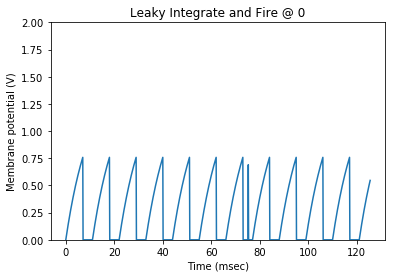

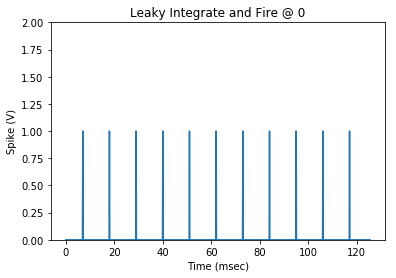

In [70]:
plot_membrane_potential(neuron_time, neuron_Vm, neuron_id = "0")
plot_spikes(neuron_time, neuron_output, neuron_id = "0")